In [1]:
# Import package
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Plot parameter setting 
plt.style.use('default')
plt.rcParams['axes.titlesize'] = 18
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['legend.fontsize'] = "large"
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['figure.figsize'] = 8, 6
plt.rcParams['figure.dpi'] = 100

In [4]:
# Load data
training = pd.read_csv("./feature_training.csv", header=0, index_col=0)
training.reset_index(inplace=True, drop=True)
testing = pd.read_csv("./feature_testing.csv", header=0, index_col=0)
testing.reset_index(inplace=True, drop=True)


,Surface,Cycle,0,1,2,3,4,5,6,7,8,9
0,Clean,13716,-0.522740,-0.813074,0.100245,0.311397,-0.354183,0.979234,1.799738,0.625264,-0.312978,0.220667
1,L2,13707,-1.986412,0.441383,1.904653,-0.704371,0.396740,-1.281666,-0.665696,-0.653024,0.657738,-0.625537
2,L2,13762,-0.313644,0.859536,0.641567,0.513362,-0.946376,0.941878,-0.663953,-0.823089,-1.685873,-1.109351
3,L1,13764,-0.522740,0.441383,0.641567,0.287636,0.184395,-1.569297,0.527384,0.058413,-0.517435,0.231087
4,Clean,13696,0.940932,-1.231227,-1.343282,-0.187577,1.361113,0.567818,1.793728,0.331726,-0.512650,0.779758
...,...,...,...,...,...,...,...,...,...,...,...,...
67,L1,13741,-0.940932,-0.394922,0.641567,0.388619,0.545406,-1.814072,-0.666597,-0.424973,0.658505,0.125906
68,L2,13768,-1.150028,0.441383,1.182890,-0.443004,0.138092,0.542217,-0.668220,-1.131601,-1.687764,-1.216234
69,L2,13753,0.731836,0.023231,-0.621518,-0.484585,-0.445363,-0.282983,-0.667980,-0.330836,0.655493,0.656125
70,Clean,13771,0.522740,0.441383,-0.260637,-1.850823,-1.195585,-0.585161,-0.660046,-0.573081,-0.319240,-0.080382


$$ \text{Fisher's ratio} = \frac{(\mu_1 - \mu_2)^2}{\sigma_1^2 + \sigma_2^2} $$

In [6]:
# Fisher Ratio
Feature = pd.concat([testing, training]) # Combine two dataset for Fisher's ratio

Feature.loc["Fisher 1"] = "" # New "row" to store Fisher's ratio
Feature.loc["Fisher 2"] = ""

# Seperate data to three class
Fclean = Feature[Feature.Surface == "Clean"]
Fl1 = Feature[Feature.Surface == "L1"]
Fl2 = Feature[Feature.Surface == "L2"]

# Go through each features to calculate Fisher's ratio
for feature in Feature.columns[2:]:
    # Your code for calculating mean and std each class
    mclean = np.mean(Fclean[feature])
    ml1=np.mean(Fl1[feature])
    ml2=np.mean(Fl2[feature])
    
    sclean=np.std(Fclean[feature])
    sl1=np.std(Fl1[feature])
    sl2=np.std(Fl2[feature])
    
    
    Feature.loc["Fisher 1", feature] = (mclean - ml1)**2/(sclean**2 +sl1**2) # Your code for Fisher's ratio
    Feature.loc["Fisher 2", feature] = (mclean - ml2)**2/(sclean**2 +sl2**2)# Your code for Fisher's ratio


Feature.loc["Fisher mix"] = Feature.loc["Fisher 1"] + Feature.loc["Fisher 2"] # New "row" for sum of Fisher 1 and Fisher 2
Feature


,Surface,Cycle,0,1,2,3,4,5,6,7,8,9
0,Clean,13748,0.104548,-1.231227,-0.621518,1.570711,-0.890982,1.342849,1.799618,0.025748,-0.314395,0.767315
1,L1,13711,0.313644,0.859536,0.100245,-1.535994,-0.623482,-0.890214,0.528887,-0.524102,-0.513832,-0.076898
2,Clean,13775,-0.52274,0.859536,0.822008,0.869772,-1.015916,0.573105,0.527264,-0.743766,-0.518558,-0.214799
3,L1,13770,0.104548,0.023231,-0.080196,0.05597,-0.815817,0.113732,-0.66816,-1.019733,0.656142,-0.668983
4,L1,13737,-1.56822,0.023231,1.363331,-1.185525,-0.37841,-1.337659,-0.665876,-0.212118,1.936232,-0.242032
...,...,...,...,...,...,...,...,...,...,...,...,...
70,Clean,13771,0.52274,0.441383,-0.260637,-1.850823,-1.195585,-0.585161,-0.660046,-0.573081,-0.31924,-0.080382
71,Clean,13789,0.731836,-1.231227,-1.162841,0.531183,0.185043,1.301506,-0.657582,-0.154701,-0.352262,0.61137
Fisher 1,,,0.104265,0.334793,0.289939,0.362742,0.000241,2.857666,0.866664,0.239914,0.03324,0.200868
Fisher 2,,,0.152803,0.502799,0.44495,0.316012,0.001629,1.73777,1.195226,0.036298,0.000006,0.06927


Text(0, 0.5, "Fisher's Ratio")

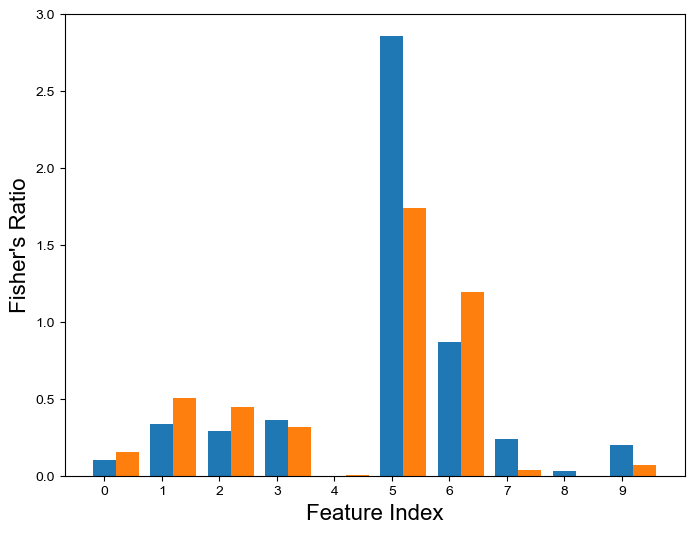

In [12]:
# Fisher plot
barwidth = 0.4
x1 = np.arange(0, 10)
x2 = [x + barwidth for x in x1]
plt.bar(x1, Feature.loc["Fisher 1"][2:], width=barwidth, label="Fisher 1")
plt.bar(x2, Feature.loc["Fisher 2"][2:], width=barwidth, label="Fisher 2")
plt.xticks(x1)
plt.xlabel("Feature Index")
plt.ylabel("Fisher's Ratio")
# Your code to add legend, label and anyother useful information

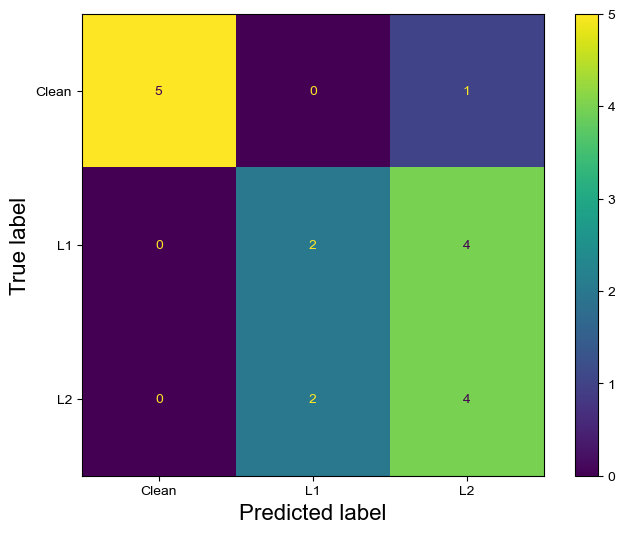

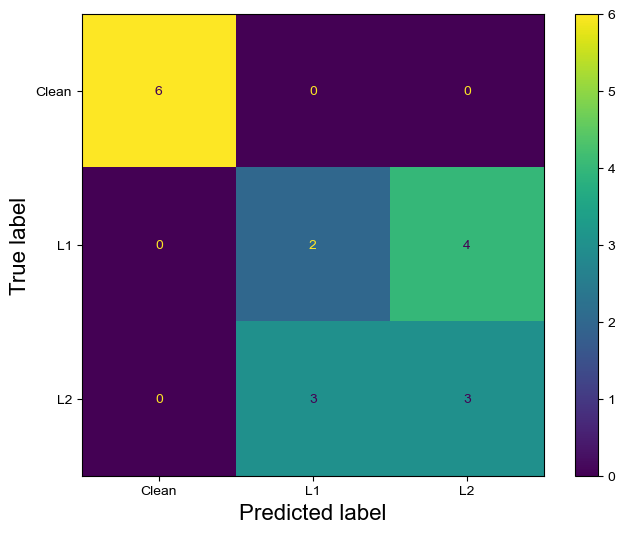

In [26]:
# LDA & QDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
 
selected = ["5","6", "1","2","3"] # Include your selected features

x_train = training[selected]
y_train = training["Surface"]
x_test = testing[selected]
y_test = testing["Surface"]

LDA = LinearDiscriminantAnalysis()
QDA = QuadraticDiscriminantAnalysis()
LDA.fit(x_train, y_train)
QDA.fit(x_train, y_train)

cm = confusion_matrix(y_test, LDA.predict(x_test)) # Change for different classifier
class_label = ["Clean", "L1", "L2"]
ConfusionMatrixDisplay(cm, display_labels=class_label).plot()

cm = confusion_matrix(y_test, QDA.predict(x_test)) # Change for different classifier
class_label = ["Clean", "L1", "L2"]
ConfusionMatrixDisplay(cm, display_labels=class_label).plot()

In [28]:
# Go through all combination
from itertools import  combinations
selected = ["5","6", "1","2","3"] # Include your selected features

# Build a dataframe to store m, feature index, LDA_error, QDA_error
CombinList = pd.DataFrame(columns=["m", "feature", "LDA", "QDA"])

for n in range(2, 6):
    combine = list(combinations(selected, n)) # Get all combination (including "n" elements from "selected")
    for c in combine:
        c = list(c)
        x_train = training[c]
        y_train = training["Surface"]
        x_test = testing[c]
        y_test = testing["Surface"]
        
        # LDA
        lda = LinearDiscriminantAnalysis()
        lda.fit(x_train, y_train)
        lda_e = 1-accuracy_score(lda.predict(x_test), y_test) # Get the misclassification rate

        # Your code for QDA
        qda=QuadraticDiscriminantAnalysis()
        qda.fit(x_train,y_train)
        qda_e = 1-accuracy_score(qda.predict(x_test), y_test) # Change zero to your code for missclassification rate
        
        CombinList.loc[len(CombinList)] = [len(c), c, lda_e, qda_e]

CombinList

,m,feature,LDA,QDA
0,2,"[5, 6]",0.333333,0.277778
1,2,"[5, 1]",0.388889,0.388889
2,2,"[5, 2]",0.444444,0.555556
3,2,"[5, 3]",0.388889,0.555556
4,2,"[6, 1]",0.277778,0.333333
5,2,"[6, 2]",0.500000,0.500000
6,2,"[6, 3]",0.388889,0.444444
7,2,"[1, 2]",0.611111,0.611111
8,2,"[1, 3]",0.500000,0.500000
9,2,"[2, 3]",0.444444,0.500000


Text(0, 0.5, 'Misclassification rate')

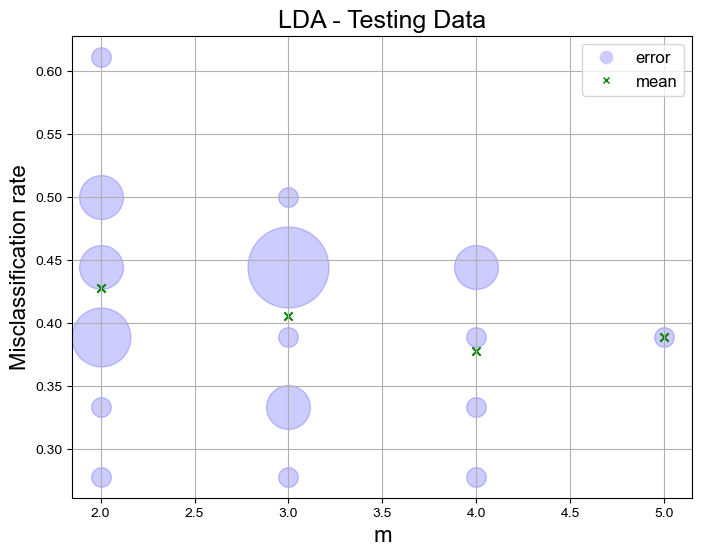

In [29]:
# m-plot LDA
for m in range(2, 6):
    # count repeated rate
    count = CombinList.loc[CombinList.m==m, "LDA"].value_counts()
    
    # adjust the scatter size base on repeated value
    for c in count.index:
        plt.scatter(m, c, s=200+(count[c]-1)*800, c="blue", alpha=0.2)
    
    # Average
    error_mean = CombinList.loc[CombinList.m==m, "LDA"].mean()
    plt.scatter(m, error_mean, color="green", marker="x")

# Create legend manually
legend_elements = [
    plt.Line2D([0], [0],  color="white", marker="o",  markerfacecolor="blue", alpha=0.2,  markersize=10, label="error"),
    plt.Line2D([0], [0],  color="white", marker="x",  markeredgecolor="green", markersize=5, label="mean")
]

plt.grid()
plt.legend(handles=legend_elements)
plt.title("LDA - Testing Data")
plt.xlabel("m")
plt.ylabel("Misclassification rate")

Text(0, 0.5, 'Misclassification rate')

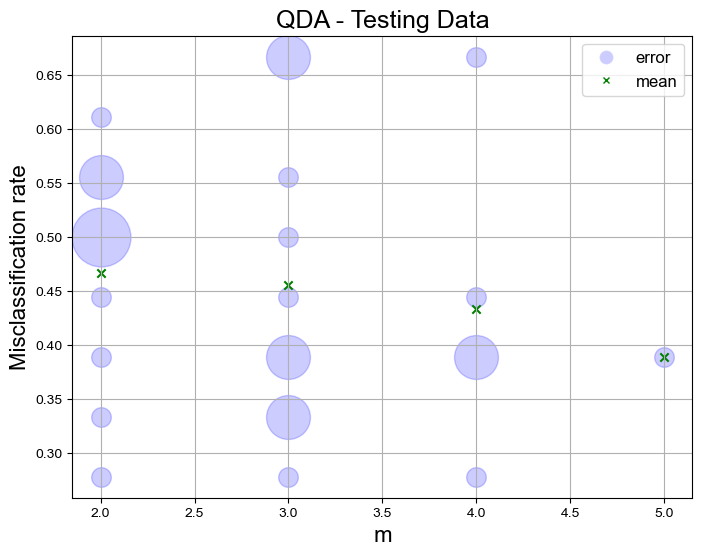

In [31]:
# m-plot QDA
for m in range(2, 6):
    # count repeated rate
    count = CombinList.loc[CombinList.m==m, "QDA"].value_counts()
    
    # adjust the scatter size base on repeated value
    for c in count.index:
        plt.scatter(m, c, s=200+(count[c]-1)*800, c="blue", alpha=0.2)
    
    # Average
    error_mean = CombinList.loc[CombinList.m==m, "QDA"].mean()
    plt.scatter(m, error_mean, color="green", marker="x")

# Create legend manually
legend_elements = [
    plt.Line2D([0], [0],  color="white", marker="o",  markerfacecolor="blue", alpha=0.2,  markersize=10, label="error"),
    plt.Line2D([0], [0],  color="white", marker="x",  markeredgecolor="green", markersize=5, label="mean")
]

plt.grid()
plt.legend(handles=legend_elements)
plt.title("QDA - Testing Data")
plt.xlabel("m")
plt.ylabel("Misclassification rate")

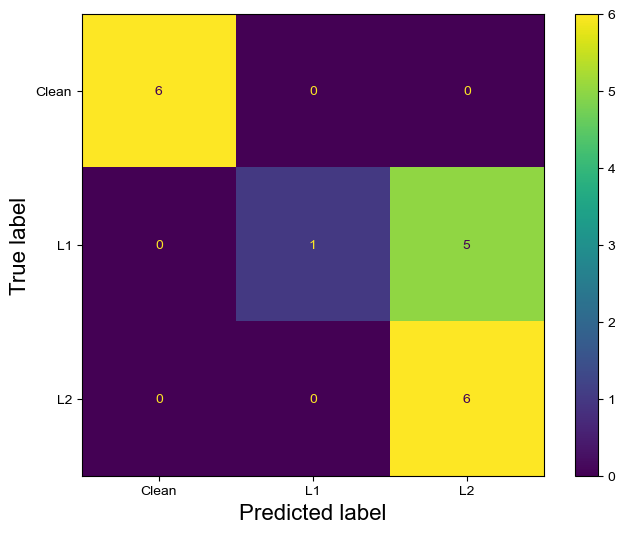

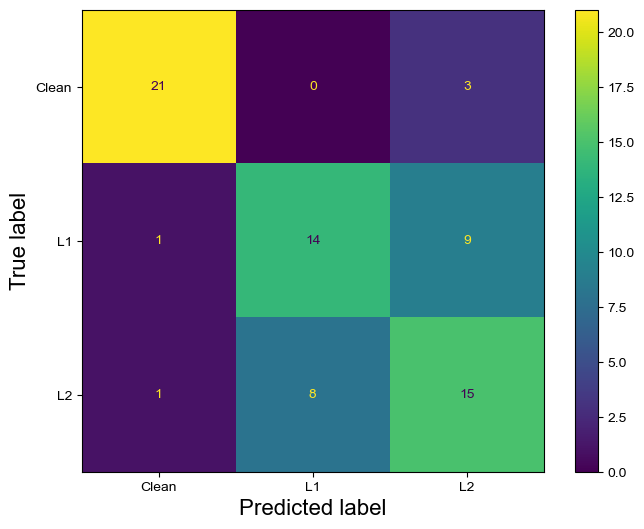

In [40]:
# LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
 
selected = ["5","6", "1","3"] # Include your selected features

x_train = training[selected]
y_train = training["Surface"]
x_test = testing[selected]
y_test = testing["Surface"]

LDA = LinearDiscriminantAnalysis()

LDA.fit(x_train, y_train)


cm = confusion_matrix(y_test, LDA.predict(x_test)) # Change for different classifier
class_label = ["Clean", "L1", "L2"]
ConfusionMatrixDisplay(cm, display_labels=class_label).plot()

cm2 = confusion_matrix(y_train, LDA.predict(x_train))
class_label = ["Clean", "L1", "L2"]
ConfusionMatrixDisplay(cm2, display_labels=class_label).plot()


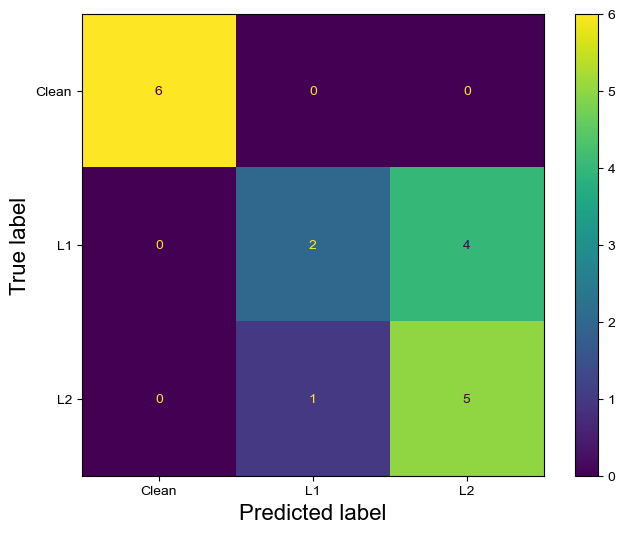

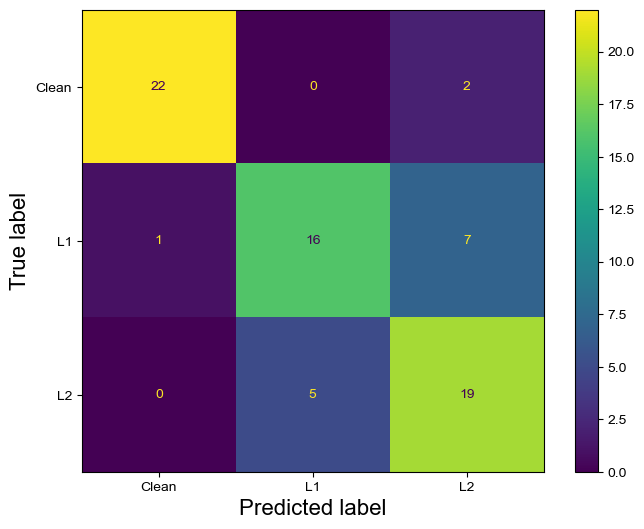

In [43]:
#  QDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
 
selected = ["5","6", "1","3"] # Include your selected features

x_train = training[selected]
y_train = training["Surface"]
x_test = testing[selected]
y_test = testing["Surface"]


QDA = QuadraticDiscriminantAnalysis()

QDA.fit(x_train, y_train)



cm = confusion_matrix(y_test, QDA.predict(x_test)) # Change for different classifier
class_label = ["Clean", "L1", "L2"]
ConfusionMatrixDisplay(cm, display_labels=class_label).plot()

cm2 = confusion_matrix(y_train, QDA.predict(x_train)) # Change for different classifier
class_label = ["Clean", "L1", "L2"]
ConfusionMatrixDisplay(cm2, display_labels=class_label).plot()